# Forest Cover Type Dataset

Dataset: http://archive.ics.uci.edu/ml/datasets/Covertype

## Data Exploration

We can see that there are 12 independent variables.
Out of them, 10 are quantitative variables.
The other 2 are categorical variables which are one-hot encoded.
There is a categorical dependent variable.

In [1]:
# Initialization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# Data is in CSV format, but file doesn't have a header
# So manually specify column names

import numpy as np

cont_names = [
    "Elevation",
    "Aspect",
    "Slope",
    "R_Hydrology",
    "Z_Hydrology",
    "R_Roadways",
    "Hillshade_9am",
    "Hillshade_Noon",
    "Hillshade_3pm",
    "R_Fire_Points",
] # Continuous variables

cont_dict = {name: np.float64 for name in cont_names}
area_names = ['WArea_' + str(i + 1) for i in range(4)]
area_dict = {name: np.int64 for name in area_names}
soil_names = ['Soil_' + str(i + 1) for i in range(40)]
soil_dict = {name: np.int64 for name in soil_names}
cat_names = area_names + soil_names # Categorical variables

target = 'Cover_Type'

names = cont_names + cat_names # All column names except target
dtypes_dict = dict(cont_dict, **area_dict); dtypes_dict.update(soil_dict)

In [5]:
# Read data

import os
import pandas as pd

data = pd.read_csv('covtype.data', header=None, names=names + [target], dtype=dtypes_dict)

In [6]:
print(data.shape)

(581012, 55)


### First look at continuous variables

In [7]:
data.head()[cont_names]

,Elevation,Aspect,Slope,R_Hydrology,Z_Hydrology,R_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,R_Fire_Points
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0


In [8]:
data.describe()[cont_names]

,Elevation,Aspect,Slope,R_Hydrology,Z_Hydrology,R_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,R_Fire_Points
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000


Note that there are no missing values.
Even the readme says so.

percentage distribution of classes:


,percentage
2,48.759922
1,36.460521
3,6.153746
7,3.530048
6,2.989095
5,1.633873
4,0.472796


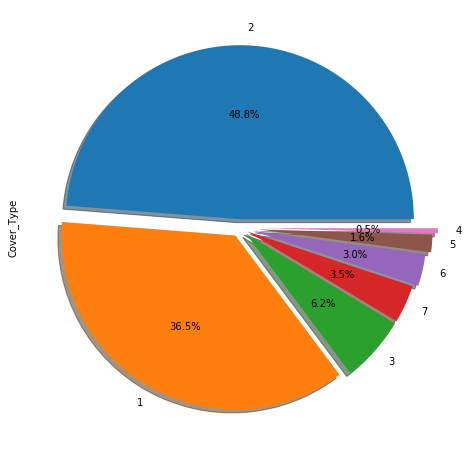

In [22]:
# Class distribution

print("percentage distribution of classes:")
series = 100 * data['Cover_Type'].value_counts() / data['Cover_Type'].count()
fig, ax = plt.subplots(figsize=(12, 8))
data['Cover_Type'].value_counts().plot.pie(explode=[0.05,0.05,0.05,0.05,0.08,0.11,0.14],
                                           autopct='%1.1f%%',ax=ax,shadow=True)
ax.set_aspect('equal')

pd.DataFrame({'percentage': series})

We have 7 classes out of which 2 classes form 85% of the data. There are 2 classes with less than 2% representation. Hence, we have heavily skewed classes and we need to take care about that while analysis.

## Correlated variables

In [ ]:
corr_mat = data.corr()

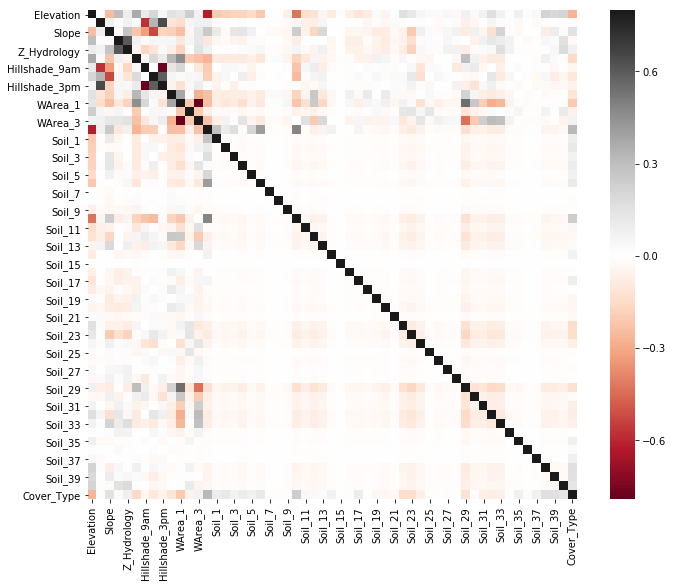

In [25]:
fig, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr_mat, vmax=.8, square=True, cmap=plt.cm.RdGy);
plt.show()

In [19]:
corr_mat.shape

(55, 55)

In [9]:
# Find correlated variables

X_cont = data[cont_names]
corr_data = X_cont.corr()
size = len(cont_names)
corr_list = []
for i in range(size):
    for j in range(i+1, size):
        cc = corr_data.iloc[i,j]
        if abs(cc) > 0.5:
            corr_list.append((cc, i, j))

corr_list.sort(key=(lambda x: abs(x[0])), reverse=True)
[(cc, cont_names[i], cont_names[j]) for cc, i, j in corr_list]

[(-0.78029595228057247, 'Hillshade_9am', 'Hillshade_3pm'),
 (0.64694395349565814, 'Aspect', 'Hillshade_3pm'),
 (0.60623550595892295, 'R_Hydrology', 'Z_Hydrology'),
 (0.59427364803735461, 'Hillshade_Noon', 'Hillshade_3pm'),
 (-0.57927291094055477, 'Aspect', 'Hillshade_9am'),
 (-0.52691063966309415, 'Slope', 'Hillshade_Noon')]

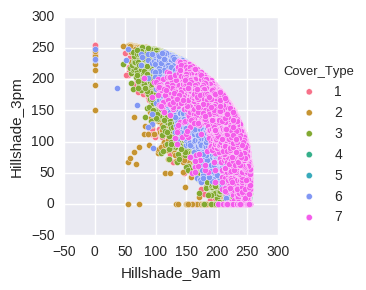

In [10]:
g = sns.pairplot(data, hue='Cover_Type', size=3,
             x_vars=['Hillshade_9am'], y_vars=['Hillshade_3pm'])
g.map_offdiag(plt.scatter, s=35, alpha=0.5)

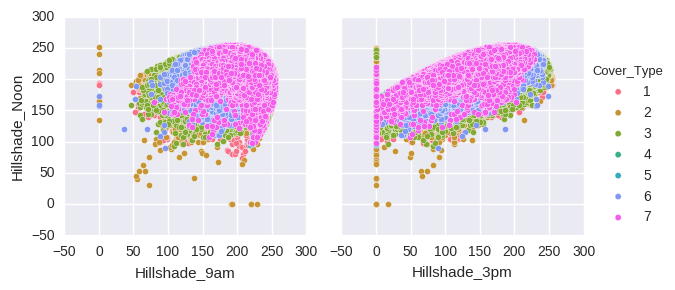

In [11]:
sns.pairplot(data, hue='Cover_Type', size=3,
             y_vars=['Hillshade_Noon'], x_vars=['Hillshade_9am', 'Hillshade_3pm'])

Slope increases from red to yellow to green to blue to pink


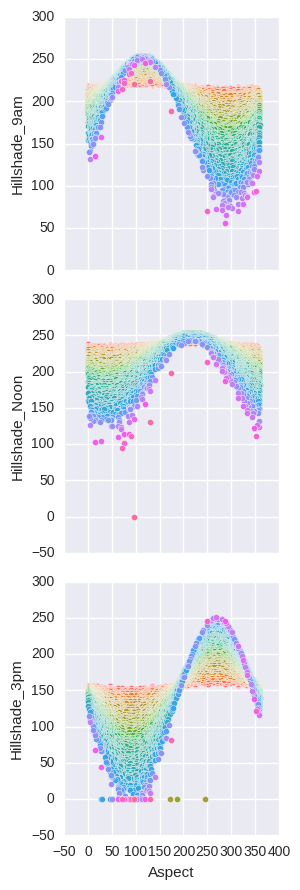

In [12]:
pp = sns.pairplot(data.iloc[::20,:], hue='Slope', size=3, x_vars=['Aspect'], 
             y_vars=['Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm'])
pp.fig.legends.clear()
print('Slope increases from red to yellow to green to blue to pink')

Aspect increases from red to yellow to green to blue to pink


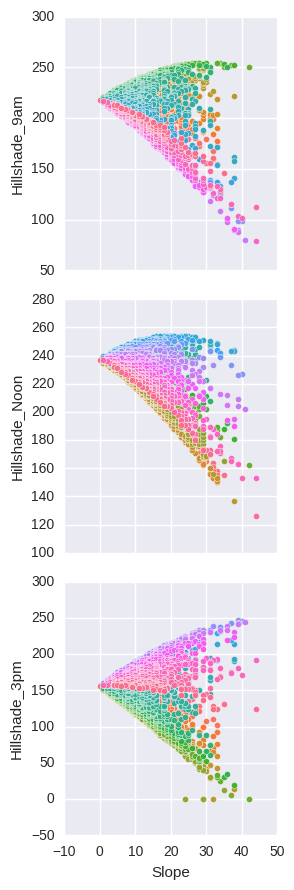

In [13]:
pp = sns.pairplot(data[data['Aspect'] <= 360].iloc[::200,:],
            hue='Aspect', size=3, x_vars=['Slope'], 
            y_vars=['Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm'])
pp.fig.legends.clear()
print('Aspect increases from red to yellow to green to blue to pink')

Since hillshade first increases and then decreases with slope,
hillshade is actually a measure of sunlight falling on an area (contrary to its name).

Let's find out the slope at which maximum sunlight is observed.

In [14]:
series = data.loc[data['Hillshade_Noon'] == data['Hillshade_Noon'].max(), 'Slope']
slope_mean, slope_std = series.mean(), series.std()
print("Slope with max sunlight: {}° ± {}°".format(slope_mean, slope_std))
Jupyter Notebook
covertype Current Kernel Logo 

Python 2

    File
    Edit
    View
    Insert
    Cell
    Kernel
    Widgets
    Help

Forest Cover Type Dataset

Dataset: http://archive.ics.uci.edu/ml/datasets/Covertype
Data Exploration

We can see that there are 12 independent variables. Out of them, 10 are quantitative variables. The other 2 are categorical variables which are one-hot encoded. There is a categorical dependent variable.

# Initialization

import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

# Data is in CSV format, but file doesn't have a header

# So manually specify column names

​

import numpy as np

​

cont_names = [

    "Elevation",

    "Aspect",

    "Slope",

    "R_Hydrology",

    "Z_Hydrology",

    "R_Roadways",

    "Hillshade_9am",

    "Hillshade_Noon",

    "Hillshade_3pm",

    "R_Fire_Points",

] # Continuous variables

​

cont_dict = {name: np.float64 for name in cont_names}

area_names = ['WArea_' + str(i + 1) for i in range(4)]

area_dict = {name: np.int64 for name in area_names}

soil_names = ['Soil_' + str(i + 1) for i in range(40)]

soil_dict = {name: np.int64 for name in soil_names}

cat_names = area_names + soil_names # Categorical variables

​

target = 'Cover_Type'

​

names = cont_names + cat_names # All column names except target

dtypes_dict = dict(cont_dict, **area_dict); dtypes_dict.update(soil_dict)

# Read data

​

import os

import pandas as pd

​

data = pd.read_csv('covtype.data', header=None, names=names + [target], dtype=dtypes_dict)

print(data.shape)

(581012, 55)

First look at continuous variables

data.head()[cont_names]

	Elevation 	Aspect 	Slope 	R_Hydrology 	Z_Hydrology 	R_Roadways 	Hillshade_9am 	Hillshade_Noon 	Hillshade_3pm 	R_Fire_Points
0 	2596.0 	51.0 	3.0 	258.0 	0.0 	510.0 	221.0 	232.0 	148.0 	6279.0
1 	2590.0 	56.0 	2.0 	212.0 	-6.0 	390.0 	220.0 	235.0 	151.0 	6225.0
2 	2804.0 	139.0 	9.0 	268.0 	65.0 	3180.0 	234.0 	238.0 	135.0 	6121.0
3 	2785.0 	155.0 	18.0 	242.0 	118.0 	3090.0 	238.0 	238.0 	122.0 	6211.0
4 	2595.0 	45.0 	2.0 	153.0 	-1.0 	391.0 	220.0 	234.0 	150.0 	6172.0

data.describe()[cont_names]

	Elevation 	Aspect 	Slope 	R_Hydrology 	Z_Hydrology 	R_Roadways 	Hillshade_9am 	Hillshade_Noon 	Hillshade_3pm 	R_Fire_Points
count 	581012.000000 	581012.000000 	581012.000000 	581012.000000 	581012.000000 	581012.000000 	581012.000000 	581012.000000 	581012.000000 	581012.000000
mean 	2959.365301 	155.656807 	14.103704 	269.428217 	46.418855 	2350.146611 	212.146049 	223.318716 	142.528263 	1980.291226
std 	279.984734 	111.913721 	7.488242 	212.549356 	58.295232 	1559.254870 	26.769889 	19.768697 	38.274529 	1324.195210
min 	1859.000000 	0.000000 	0.000000 	0.000000 	-173.000000 	0.000000 	0.000000 	0.000000 	0.000000 	0.000000
25% 	2809.000000 	58.000000 	9.000000 	108.000000 	7.000000 	1106.000000 	198.000000 	213.000000 	119.000000 	1024.000000
50% 	2996.000000 	127.000000 	13.000000 	218.000000 	30.000000 	1997.000000 	218.000000 	226.000000 	143.000000 	1710.000000
75% 	3163.000000 	260.000000 	18.000000 	384.000000 	69.000000 	3328.000000 	231.000000 	237.000000 	168.000000 	2550.000000
max 	3858.000000 	360.000000 	66.000000 	1397.000000 	601.000000 	7117.000000 	254.000000 	254.000000 	254.000000 	7173.000000

Note that there are no missing values. Even the readme says so.

# Class distribution

​

print("percentage distribution of classes:")

series = 100 * data['Cover_Type'].value_counts() / data['Cover_Type'].count()

fig, ax = plt.subplots(figsize=(12, 8))

data['Cover_Type'].value_counts().plot.pie(explode=[0.05,0.05,0.05,0.05,0.08,0.11,0.14],

                                           autopct='%1.1f%%',ax=ax,shadow=True)

ax.set_aspect('equal')

​

pd.DataFrame({'percentage': series})

percentage distribution of classes:

	percentage
2 	48.759922
1 	36.460521
3 	6.153746
7 	3.530048
6 	2.989095
5 	1.633873
4 	0.472796

We have 7 classes out of which 2 classes form 85% of the data. There are 2 classes with less than 2% representation. Hence, we have heavily skewed classes and we need to take care about that while analysis.
Correlated variables

corr_mat = data.corr()

fig, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(corr_mat, vmax=.8, square=True, cmap=plt.cm.RdGy);

plt.show()

corr_mat.shape

(55, 55)

# Find correlated variables

​

X_cont = data[cont_names]

corr_data = X_cont.corr()

size = len(cont_names)

corr_list = []

for i in range(size):

    for j in range(i+1, size):

        cc = corr_data.iloc[i,j]

        if abs(cc) > 0.5:

            corr_list.append((cc, i, j))

​

corr_list.sort(key=(lambda x: abs(x[0])), reverse=True)

[(cc, cont_names[i], cont_names[j]) for cc, i, j in corr_list]

[(-0.78029595228057247, 'Hillshade_9am', 'Hillshade_3pm'),
 (0.64694395349565814, 'Aspect', 'Hillshade_3pm'),
 (0.60623550595892295, 'R_Hydrology', 'Z_Hydrology'),
 (0.59427364803735461, 'Hillshade_Noon', 'Hillshade_3pm'),
 (-0.57927291094055477, 'Aspect', 'Hillshade_9am'),
 (-0.52691063966309415, 'Slope', 'Hillshade_Noon')]

g = sns.pairplot(data, hue='Cover_Type', size=3,

             x_vars=['Hillshade_9am'], y_vars=['Hillshade_3pm'])

g.map_offdiag(plt.scatter, s=35, alpha=0.5)

<seaborn.axisgrid.PairGrid at 0x7f66ec6afa90>

sns.pairplot(data, hue='Cover_Type', size=3,

             y_vars=['Hillshade_Noon'], x_vars=['Hillshade_9am', 'Hillshade_3pm'])

<seaborn.axisgrid.PairGrid at 0x7f66e95748d0>

pp = sns.pairplot(data.iloc[::20,:], hue='Slope', size=3, x_vars=['Aspect'], 

             y_vars=['Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm'])

pp.fig.legends.clear()

print('Slope increases from red to yellow to green to blue to pink')

Slope increases from red to yellow to green to blue to pink

pp = sns.pairplot(data[data['Aspect'] <= 360].iloc[::200,:],

            hue='Aspect', size=3, x_vars=['Slope'], 

            y_vars=['Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm'])

pp.fig.legends.clear()

print('Aspect increases from red to yellow to green to blue to pink')

Aspect increases from red to yellow to green to blue to pink

Since hillshade first increases and then decreases with slope, hillshade is actually a measure of sunlight falling on an area (contrary to its name).

Let's find out the slope at which maximum sunlight is observed.


Slope with max sunlight: 20.35055913249746° ± 2.4989302288323088°


```Slope where we get maximum sunlight = 20.35°.
Latitude = 40.63° (from readme and google).
So, the sun was off by 20.28° away from horizon, which means data was collected in summer.
Assuming noon sun angle offset varies sinusoidally with time of the year,
we get day of year as asin(a / 23.5) / pi * 365.25 / 2 days = 61 days
from Spring Equinox, i.e. March 20.
Therefore the estimated data collection date is May 20.
```

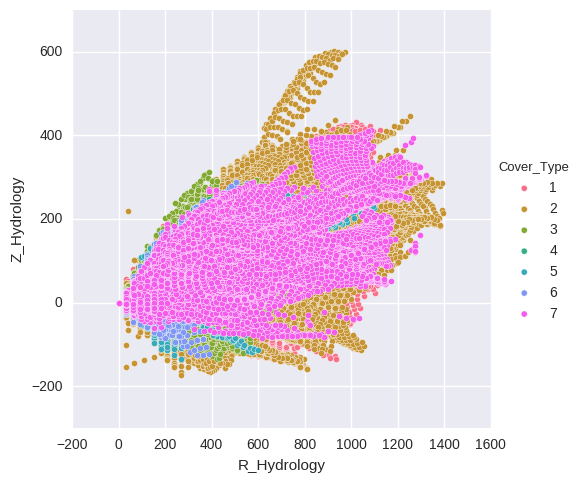

In [15]:
sns.pairplot(data, hue='Cover_Type', size=5, x_vars=['R_Hydrology'],
             y_vars=['Z_Hydrology'])

## Preprocessing

### Feature creation

By reading the dataset description, we can see that soils are also grouped by 'climatic zone' (referred to as `czone` from now on) and 'geologic zone' (referred to as `gzone` from now on). This data is not present in the dataset. We can add it ourselves.

In [18]:
# One-cool binary columns (reverse of one-hot encoding procedure)

data['soil_type'] = 0
for i in range(1, 41):
    data['soil_type'] += i * data['Soil_' + str(i)]
data['warea'] = 0
for i in range(1, 5):
    data['warea'] += i * data['WArea_' + str(i)]
data.head()

,Elevation,Aspect,Slope,R_Hydrology,Z_Hydrology,R_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,R_Fire_Points,...,Soil_34,Soil_35,Soil_36,Soil_37,Soil_38,Soil_39,Soil_40,Cover_Type,soil_type,warea
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,...,0,0,0,0,0,0,0,5,29,1
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,...,0,0,0,0,0,0,0,5,29,1
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,...,0,0,0,0,0,0,0,2,12,1
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,...,0,0,0,0,0,0,0,2,30,1
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,...,0,0,0,0,0,0,0,5,29,1


In [19]:
# Get soil type data from readme.txt

czone_to_soil = {
    2: range(1, 7),
    3: range(7, 9),
    4: range(9, 14),
    5: range(14, 16),
    6: range(16, 19),
    7: range(19, 35),
    8: range(35, 41),
}

gzone_to_soil = {
    1: [14, 15, 16, 17, 19, 20, 21],
    2: [9, 22, 23],
    5: range(7, 9),
    7: list(range(1, 7)) + list(range(10, 14)) + [18] + list(range(24, 41)),
}

def invert_dict(d):
    """Takes a dict where values are iterables and returns an inverse mapping"""
    newdict = {}
    for k, vlist in d.items():
        for v in vlist:
            newdict[v] = k
    return newdict

soil_to_czone = invert_dict(czone_to_soil)
soil_to_gzone = invert_dict(gzone_to_soil)

In [20]:
# make columns for czone and gzone and one-hot encode them

data['czone'] = data['soil_type'].map(soil_to_czone)
data['gzone'] = data['soil_type'].map(soil_to_gzone)

for soil_type in range(1, 41):
    czone_num = soil_to_czone[soil_type]
    data['czone' + str(czone_num)] = data['czone'].map(lambda x: 1 if x==czone_num else 0)
for soil_type in range(1, 41):
    gzone_num = soil_to_gzone[soil_type]
    data['gzone' + str(gzone_num)] = data['gzone'].map(lambda x: 1 if x==gzone_num else 0)

In [21]:
czone_names = ['czone' + str(c) for c in czone_to_soil.keys()]
gzone_names = ['gzone' + str(g) for g in gzone_to_soil.keys()]

cg_names = czone_names + gzone_names
cat_names += cg_names
names += cg_names

In [22]:
# Write only cooled data to a separate CSV file if needed

cool_data = data[list(data.columns[:10]) + ['warea', 'soil_type', 'czone', 'gzone', 'Cover_Type']]
# cool_data.to_csv('cool_data.csv', index=False)

## Classification

In [23]:
# Prepare input and targets

from collections import OrderedDict

y = data[target]
X = data[names]

# Don't include created features
X_no_fc = data[cont_names + area_names + soil_names]

# Replace original soil columns by created features
X_only_fc = data[cont_names + area_names + czone_names + gzone_names]

# Don't include any soil data
X_no_soil = data[cont_names + area_names]

X_dict = OrderedDict([
    ('X_no_fc', X_no_fc),
    ('X_only_fc', X_only_fc),
    ('X_no_soil', X_no_soil),
    ('X', X),
])

In [24]:
print("Null Accuracy:", y.value_counts().max() / y.count())

Null Accuracy: 0.487599223424


In [44]:
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from sklearn import metrics

def my_tts_score(clf, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y,
            test_size=0.25, random_state=2, stratify=y)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    return metrics.accuracy_score(y_test, y_pred)

def my_cross_val_score(clf, X, y):
    fold_generator = StratifiedKFold(n_splits=4, random_state=2, shuffle=True)
    return cross_val_score(clf, X, y, cv=fold_generator, n_jobs=-1)

def print_cv_accuracy(clf, X, y):
    accs = my_cross_val_score(clf, X, y)
    print("{}-fold CV accuracy: {} % ± {} %".format(4,
        100 * accs.mean(), 100 * accs.std()))

In [26]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
df = pd.DataFrame({}, columns=['mean', 'std', 'depth', 'node_count'], index=X_dict.keys())

for X_name, X_val in X_dict.items():
    accs = my_cross_val_score(dtree, X_val, y)
    df.loc[X_name, 'mean'] = 100 * accs.mean()
    df.loc[X_name, 'std'] = 100 * accs.std()
    dtree = DecisionTreeClassifier()
    dtree.fit(X_val, y)
    df.loc[X_name, 'depth'] = dtree.tree_.max_depth
    df.loc[X_name, 'node_count'] = dtree.tree_.node_count
print('CV Accuracy (in %) with DecisionTree:')
df

CV Accuracy (in %) with DecisionTree:


,mean,std,depth,node_count
X_no_fc,93.7313,0.0437463,43,55123
X_only_fc,93.1356,0.113103,40,58997
X_no_soil,92.5478,0.0918106,39,63867
X,93.728,0.0621321,37,54765


We can see that adding new features doesn't help much in increasing the accuracy of the decision tree.

By default, scikit-learn makes completely unpruned trees.
Let's try pre-pruning. (Scikit doesn't yet support post-pruning).

We will try making a decision tree for various gini thresholds
and plot a graph showing the variation.
This will help us find out the optimally pruned tree.
This tree will be pruned enough to make it general and avoid overfitting,
and it will not be too pruned to not have sufficient complexity.

In [27]:
X = X_no_fc

In [28]:
# Pre-pruning

def plot_acc_vs_impurity(minimp, maximp, intervals=10):
    # Plots accuracy vs impurities for all impurities from minimp to maximp
    # and their (intervals - 1) arithmetic means in between.
    n_splits = 4
    impurities = [minimp + (maximp - minimp) * x / intervals
                  for x in range(intervals + 1)]
    maccs = []
    for impurity in impurities:
        dtree = DecisionTreeClassifier(min_impurity_split=impurity)
        accs = my_cross_val_score(dtree, X, y)
        maccs.append(accs.mean())
    plt.plot(impurities, maccs, 'b')

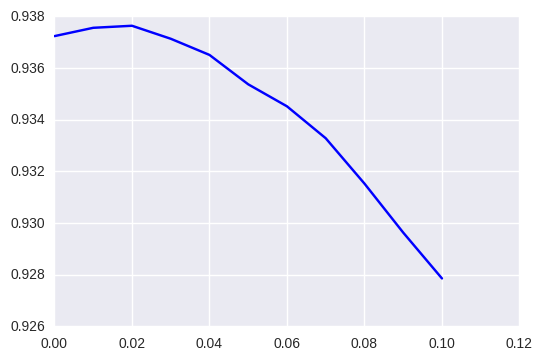

In [53]:
plot_acc_vs_impurity(0, 0.1, 10)

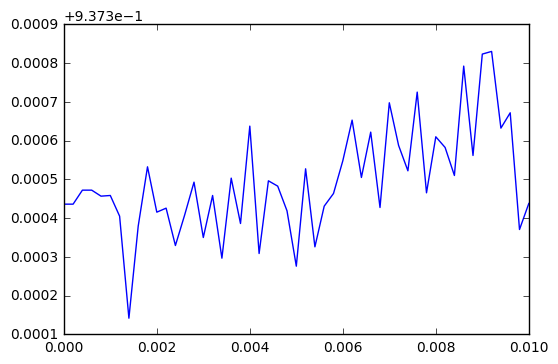

In [33]:
plot_acc_vs_impurity(0, 0.01, 50)

Since accuracy varies so stochastically with impurity threshold, increasing impurity threshold will probably not give significant benefit.

### Feature importance

In [48]:
# Find gini importance of features

def print_importance_data(col_names, feature_importances):
    fi = sorted(zip(col_names, feature_importances),
        key=(lambda x: x[1]), reverse=True)
    for i, feature_importance in enumerate(fi[:15]):
        feature, importance = feature_importance
        print('{}. {}:\t{}'.format(i + 1, feature.ljust(15), importance))

    print("Contribution of 15 most important features:",
        sum([x[1] for x in fi[:15]]))


In [30]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X, y)

print_importance_data(X.columns, dtree.feature_importances_)

1. Elevation      :	0.33530606559517073
2. R_Roadways     :	0.15203766069990582
3. R_Fire_Points  :	0.1433920777721468
4. R_Hydrology    :	0.06252644616879326
5. Z_Hydrology    :	0.04359826004981001
6. Hillshade_Noon :	0.03355498665607555
7. Hillshade_9am  :	0.029071966309422964
8. Aspect         :	0.02603329238099627
9. Hillshade_3pm  :	0.022868248947496877
10. Slope          :	0.01713613808095813
11. WArea_3        :	0.013445571863094079
12. Soil_32        :	0.012684138796128352
13. Soil_4         :	0.011589057255282448
14. Soil_2         :	0.010054631931755523
15. Soil_23        :	0.009977093450008662
Contribution of 15 most important features: 0.923275635957
Contribution of all soil variables: 0.106411481928


In [31]:
# Find accuracy when using 15 most important features

essential_features = [
    "Elevation",
    "R_Fire_Points",
    "R_Roadways",
    "R_Hydrology",
    "Z_Hydrology",
    "Hillshade_Noon",
    "Aspect",
    "Hillshade_9am",
    "Hillshade_3pm",
    "czone8",
    "czone2",
    "gzone7",
    "WArea_3",
    "Slope",
    "WArea_1",
]

X_ess = data[essential_features]

print_cv_accuracy(DecisionTreeClassifier(), X_ess, y)

4-fold CV accuracy: 92.97794227659033 % ± 0.09392627920985434 %


Removing those features didn't increase accuracy. So they were probably not noise.

In [43]:
# Ensemble Classifiers

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

clf_list = [RandomForestClassifier, AdaBoostClassifier]
importances_list = []
clf_to_name = [(clf_type, clf_type.__name__[:-len('Classifier')])
             for clf_type in clf_list]
name_to_accs = {clf_name: [] for clf_type, clf_name in clf_to_name}
ns = [10, 40]

for n in ns:
    for clf_type, clf_name in clf_to_name:
        clf = clf_type(n_estimators=n)
        accs = my_tts_score(clf, X, y)
        name_to_accs[clf_name].append(100 * accs.mean())
        clf.fit(X, y)
        importances_list.append(clf.feature_importances_)

pd.DataFrame(name_to_accs, index=ns)

,AdaBoost,RandomForest
10,64.658217,94.022843
40,54.853256,95.259306


In [52]:
print("RandomForest feature importances:")
print_importance_data(X.columns, importances_list[0])

RandomForest feature importances:
1. Elevation      :	0.25053542844109206
2. R_Roadways     :	0.12202029703610433
3. R_Fire_Points  :	0.11457692472149739
4. R_Hydrology    :	0.059916776801051085
5. Z_Hydrology    :	0.05765663240144865
6. Aspect         :	0.045856425168254146
7. Hillshade_3pm  :	0.04115374395482446
8. Hillshade_Noon :	0.040802455217959846
9. Hillshade_9am  :	0.04057353464595799
10. WArea_4        :	0.03507997975167099
11. Slope          :	0.03054749531464822
12. Soil_22        :	0.01183559230412715
13. WArea_3        :	0.01170689789706548
14. Soil_23        :	0.011424630506135918
15. Soil_4         :	0.011376754681592504
Contribution of 15 most important features: 0.885063568843
Contribution of all soil variables: 0.135192467128
